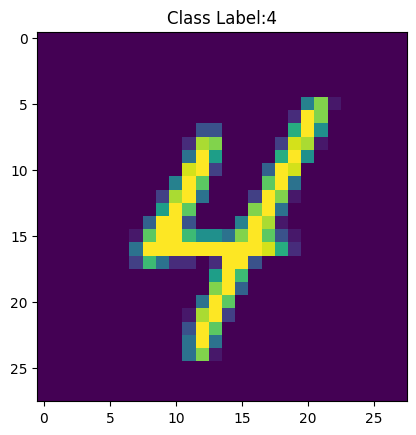

In [66]:
import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt

#Loading the data
M = loadmat('MNIST_digit_data.mat')
images_train,images_test,labels_train,labels_test= M['images_train'],M['images_test'],M['labels_train'],M['labels_test']

#just to make all random sequences on all computers the same.
np.random.seed(1)

#randomly permute data points
inds = np.random.permutation(images_train.shape[0])
images_train = images_train[inds]
labels_train = labels_train[inds]

inds = np.random.permutation(images_test.shape[0])
images_test = images_test[inds]
labels_test = labels_test[inds]

# if you want to use only the first 1000 data points.
# images_train = images_train[0:1000,:]
# labels_train = labels_train[0:1000,:]

images_test = images_test[0:100,:]
labels_test = labels_test[0:100,:]


#show the 10'th train image
i=10
im = images_train[i,:].reshape((28,28),order='F')
plt.imshow(im)
plt.title('Class Label:'+str(labels_train[i][0]))
plt.show()


In [13]:

#this KNN is very slow because it doesn't make use of parallel compute
import heapq
def KNN(images_train, labels_train,images_test, labels_test, k):
    classes_right = np.array([0 for i in range(10)])
    classes_wrong = np.array([0 for i in range (10)])
    for i in range(len(images_test)):
        pq = []
        heapq.heapify(pq)
        for i in range(len(images_train)):
            diffsum = abs(np.sum(images_train[i] - images_test[i]))
            if not len(pq) and len(pq) == k:                          
                top, label = heapq.heappop(pq)
                if diffsum < -top:                                      #we want to keep min error in heap, so maxheap pops max error
                    heapq.heappush(pq,(-diffsum, labels_train[i]))      #if the error is less than max, push it to the heap
                else:
                    heapq.heappush(pq,(top, label))                     #else push original back
            else:
                heapq.heappush(pq,(-diffsum, labels_train[i][0]))       #fill up heap to size k
        votes = np.array([t[1] for t in pq])                            #do voting by extracting 2nd element (labels) from whats left in heap
        print(votes)
        unique, counts = np.unique(votes, return_counts = True)         #get the counts
        print(unique)
        print(counts)
        index = np.argmax(counts)
        mode = unique[index]                                            #max voting by indexing counts
        print(mode, labels_test[i])
        if mode == labels_test[i]:                                      #if its correct, add it
            classes_right[labels_test[i][0]] += 1
        else:
            classes_wrong[labels_test[i][0]] += 1                       #if not, add it to wrong
    print(classes_right)
    # accuracy = np.divide(classes_right, classes_wrong + classes_right)  #classes_right/total gives accuracy                
    # return accuracy, np.mean(accuracy)
#KNN(images_train, labels_train, images_test, labels_test, 5)

    #estimate the mean of each group and update centers
    

[0 0 7 4 8 8 0 7 1 7 1 2 1 0 5 1 1 6 7 2 8 1 0 9 4 0 1 3 3 0 1 3 7 1 3 2 9
 1 0 2 0 8 3 5 6 1 4 7 4 1 8 1 1 7 6 2 5 2 0 3 1 4 3 3 2 9 9 0 7 0 2 1 4 1
 7 1 1 3 3 5 9 4 8 0 2 2 2 7 1 9 7 5 1 2 1 1 1 1 5 3 2 2 1 9 0 9 3 2 3 1 6
 6 4 1 8 9 1 3 7 6 1 8 0 2 1 7 0 0 6 5 2 0 6 2 4 2 1 7 7 1 6 8 8 1 1 9 4 1
 1 2 2 3 1 3 2 0 5 6 1 4 8 2 1 8 2 3 1 6 1 2 3 5 3 0 0 0 0 6 5 9 7 6 5 3 7
 1 0 2 4 5 3 3 1 6 1 1 9 6 2 8 6 8 1 5 8 7 3 0 6 3 0 5 6 9 3 3 6 4 6 4 3 3
 1 1 7 4 8 2 6 0 0 0 1 2 9 5 6 4 3 6 7 5 2 4 8 5 1 2 4 2 7 1 8 7 1 9 0 9 4
 2 7 4 3 3 8 2 8 0 1 6 4 8 8 8 2 4 1 5 5 4 4 7 7 4 1 6 1 3 4 2 7 2 4 6 3 0
 8 4 5 1 0 7 0 4 0 9 6 6 0 3 6 1 1 3 4 6 6 4 8 0 8 9 5 3 5 0 1 1 4 7 4 1 4
 4 4 3 7 2 6 4 2 7 8 8 2 9 7 8 0 6 4 9 9 9 6 8 0 8 2 5 0 8 0 1 1 7 3 9 4 6
 1 4 6 7 2 8 2 7 8 7 9 9 3 4 1 5 6 8 7 1 1 4 8 0 2 1 7 3 8 0 4 7 8 3 7 1 9
 4 9 8 9 0 9 6 3 8 3 9 9 1 0 7 5 5 4 2 5 1 1 0 0 8 3 2 4 5 7 5 3 3 9 2 8 2
 2 7 4 7 3 0 5 8 4 7 2 7 0 5 7 0 5 0 5 9 1 5 4 2 8 9 1 0 2 7 3 6 7 2 6 3 8
 1 5 6 5 3 6 4 8 1 5 3 0 

KeyboardInterrupt: 

In [57]:
distances = abs(np.linalg.norm(images_test[:, np.newaxis, :] - images_train[np.newaxis, :,:], axis = 2))#calculate euclidean distance

In [53]:
def KNN2(images_train, labels_train,images_test, labels_test, k):
    #this KNN is faster because it uses paralle compute
    
    classes_right = np.array([0 for i in range(10)])
    classes_wrong = np.array([0 for i in range (10)])
    for i in range(len(images_test)):
        distances = abs(np.linalg.norm(images_test[i] - images_train, axis = 1))#calculate euclidean distance
        voteIdx = distances.argsort()[:k]                                       #sort indices and keep k closest neighbors
        votes = [i[0] for i in labels_train[voteIdx]]                           #get votes, get rid of pesky [] inside so stats.mode can work properly
        maxvote = scipy.stats.mode(votes)[0]
        if maxvote == labels_test[i][0]:                                        #if its correct, add it
            classes_right[labels_test[i][0]] += 1
        else:
            classes_wrong[labels_test[i][0]] += 1                               #if not, add it to wrong
    accuracy = classes_right/(classes_right+classes_wrong)
    accMean = accuracy.mean()
    return accuracy, accMean
    
KNN2(images_train, labels_train, images_test, labels_test, 5)

(array([0.98058252, 1.        , 0.84848485, 0.89565217, 0.8045977 ,
        0.75531915, 0.94186047, 0.87068966, 0.77319588, 0.85294118]),
 0.8723323569803274)

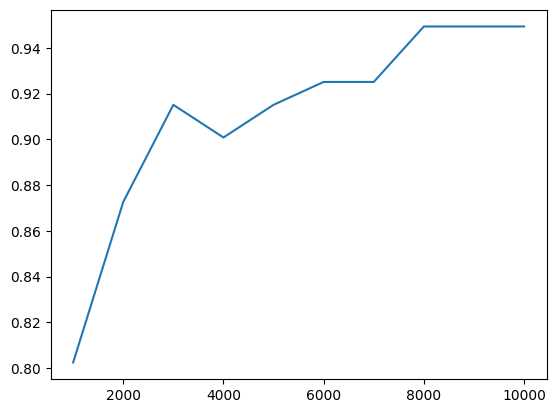

In [67]:
#plotting accuracy for k=1 for increasing sizes of training data (increases of 1000 up to 10000)
y = [ KNN2(images_train[:(1000*(i+1))], labels_train[:(1000*(i+1))], images_test, labels_test,1)[1] for i in range(10)]
x = [ 1000*(i+1) for i in range(10)]
plt.plot(x,y)
    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


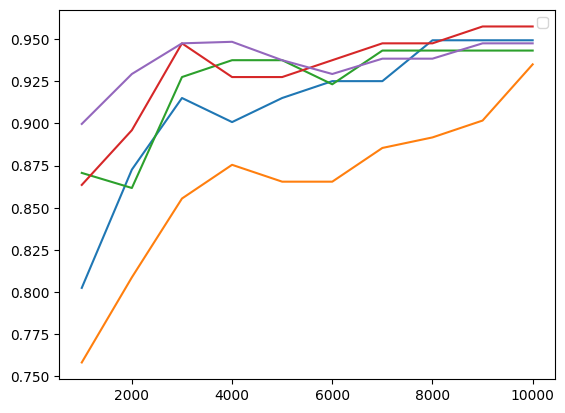

In [68]:
#comparing accuracy of different k's as the training data size increases
for k in [1,2,3,5,10]:
    y = [ KNN2(images_train[:(1000*(i+1))], labels_train[:(1000*(i+1))], images_test, labels_test,k)[1] for i in range(10)]
    x = [ 1000*(i+1) for i in range(10)]
    plt.plot(x,y)
plt.legend()
plt.show()

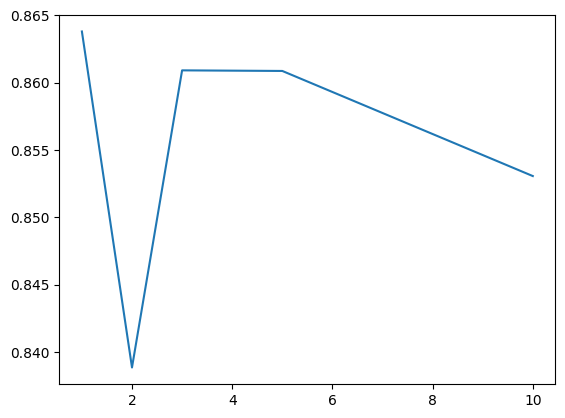

In [70]:
#plotting the best k, comparing validation accuracy
idx = np.random.permutation(2000)
trainIm = images_train[idx[:1000]]
trainLb = labels_train[idx[:1000]]
valIm = images_train[idx[1000:]]
valLb = labels_train[idx[1000:]]
y = [ KNN2(trainIm, trainLb, valIm, valLb,k)[1] for k in [1,2,3,5,10]]
x = [1,2,3,5,10]
plt.plot(x,y)



In [72]:
#accuracy of best k (which is 1), on the test set
KNN2(trainIm, trainLb, images_test, labels_test, 1)[1]


0.8158549783549784